# Steam players analysis

### Lets start by importing all the necessary packages and modules and read the data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
steam = pd.read_csv('Valve_Player_Data.csv', index_col=0)
np.random.seed(0)

In [3]:
steam

,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
Month_Year,,,,,,,
September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...
December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2


In [4]:
steam.dtypes

Avg_players     float64
Gain            float64
Percent_Gain     object
Peak_Players      int64
URL              object
Date             object
Game_Name        object
dtype: object

# Data cleaning

### we see that the column 'Percent_Gain' is in the object data type and it has to do with the % sign and the '-' sign so first we will get rid of those signs and convert the column to type float or int.

In [5]:
steam['Percent_Gain'] = steam['Percent_Gain'].str.replace('+' , '')
steam['Percent_Gain'] = steam['Percent_Gain'].str.replace('-' , '')
steam['Percent_Gain'] = steam['Percent_Gain'].str.replace('%' , '')

<ipython-input-5-4a84d6db8c19>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  steam['Percent_Gain'] = steam['Percent_Gain'].str.replace('+' , '')


In [6]:
steam

,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
Month_Year,,,,,,,
September 2021,512350.92,268.96,0.05,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
August 2021,512081.96,6014.60,1.19,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
July 2021,506067.36,-43279.72,7.88,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
June 2021,549347.08,-110541.81,16.75,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
May 2021,659888.89,-63457.63,8.77,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...
December 2016,192.03,-21.90,10.24,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
November 2016,213.92,-134.68,38.63,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
October 2016,348.60,-201.75,36.66,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2


In [7]:
 steam['Percent_Gain'].astype(object).astype(float)

Month_Year
September 2021       0.05
August 2021          1.19
July 2021            7.88
June 2021           16.75
May 2021             8.77
                   ...   
December 2016       10.24
November 2016       38.63
October 2016        36.66
September 2016    7654.89
August 2016           NaN
Name: Percent_Gain, Length: 5271, dtype: float64

In [8]:
steam

,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
Month_Year,,,,,,,
September 2021,512350.92,268.96,0.05,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
August 2021,512081.96,6014.60,1.19,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
July 2021,506067.36,-43279.72,7.88,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
June 2021,549347.08,-110541.81,16.75,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
May 2021,659888.89,-63457.63,8.77,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...
December 2016,192.03,-21.90,10.24,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
November 2016,213.92,-134.68,38.63,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
October 2016,348.60,-201.75,36.66,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2


### Now we dont need all of the columns so we will drop the 'Date' and the 'URL' Column and get a new dataset under a new variable.

In [9]:
## Made Original
steam_new = steam.drop(['URL', 'Date'], axis=1)

In [10]:
##Made Original
steam_new

,Avg_players,Gain,Percent_Gain,Peak_Players,Game_Name
Month_Year,,,,,
September 2021,512350.92,268.96,0.05,942519,Counter Strike: Global Offensive
August 2021,512081.96,6014.60,1.19,802544,Counter Strike: Global Offensive
July 2021,506067.36,-43279.72,7.88,763523,Counter Strike: Global Offensive
June 2021,549347.08,-110541.81,16.75,929940,Counter Strike: Global Offensive
May 2021,659888.89,-63457.63,8.77,1087197,Counter Strike: Global Offensive
...,...,...,...,...,...
December 2016,192.03,-21.90,10.24,405,Divinity: Original Sin 2
November 2016,213.92,-134.68,38.63,537,Divinity: Original Sin 2
October 2016,348.60,-201.75,36.66,1031,Divinity: Original Sin 2


In [11]:
## Changed one
steam_new.dropna(subset = ["Avg_players", "Gain", "Percent_Gain", "Peak_Players"], inplace=True)

In [12]:
## Changed one
steam_new

,Avg_players,Gain,Percent_Gain,Peak_Players,Game_Name
Month_Year,,,,,
September 2021,512350.92,268.96,0.05,942519,Counter Strike: Global Offensive
August 2021,512081.96,6014.60,1.19,802544,Counter Strike: Global Offensive
July 2021,506067.36,-43279.72,7.88,763523,Counter Strike: Global Offensive
June 2021,549347.08,-110541.81,16.75,929940,Counter Strike: Global Offensive
May 2021,659888.89,-63457.63,8.77,1087197,Counter Strike: Global Offensive
...,...,...,...,...,...
January 2017,206.26,14.23,7.41,429,Divinity: Original Sin 2
December 2016,192.03,-21.90,10.24,405,Divinity: Original Sin 2
November 2016,213.92,-134.68,38.63,537,Divinity: Original Sin 2


### Now we will create a new column having the total gain or loss of players and do not worry if you do not understand which ones gain or loss you can just compare it with the 'Avg_players' column and get the idea

In [13]:
# Changed orginal new
steam_new['Total_gain_loss'] = steam_new['Avg_players'] + steam_new['Gain']

In [14]:
# Changed orginal new
steam_new

,Avg_players,Gain,Percent_Gain,Peak_Players,Game_Name,Total_gain_loss
Month_Year,,,,,,
September 2021,512350.92,268.96,0.05,942519,Counter Strike: Global Offensive,512619.88
August 2021,512081.96,6014.60,1.19,802544,Counter Strike: Global Offensive,518096.56
July 2021,506067.36,-43279.72,7.88,763523,Counter Strike: Global Offensive,462787.64
June 2021,549347.08,-110541.81,16.75,929940,Counter Strike: Global Offensive,438805.27
May 2021,659888.89,-63457.63,8.77,1087197,Counter Strike: Global Offensive,596431.26
...,...,...,...,...,...,...
January 2017,206.26,14.23,7.41,429,Divinity: Original Sin 2,220.49
December 2016,192.03,-21.90,10.24,405,Divinity: Original Sin 2,170.13
November 2016,213.92,-134.68,38.63,537,Divinity: Original Sin 2,79.24


## ......................................................................................................................................

# Modification and creation

## Here we will create a few new dataframes from which we will analyze and visualize the data

In [15]:
## First DF
games = pd.DataFrame(steam_new.groupby(['Game_Name']).sum())

In [16]:
## First DF
new_games = games.reset_index(level = ['Game_Name'])

In [17]:
new_games

,Game_Name,Avg_players,Gain,Peak_Players,Total_gain_loss
0,7 Days to Die,948851.60,17075.57,1733221,965927.17
1,ARK: Survival Evolved,3309493.76,39484.19,5722206,3348977.95
2,Age of Empires II: Definitive Edition,328633.42,659.53,596283,329292.95
3,Apex Legends,1249250.43,64690.70,2348662,1313941.13
4,Arma 3,1563779.46,7903.84,3240072,1571683.30
...,...,...,...,...,...
89,World of Warships,275791.75,7288.64,857856,283080.39
90,Yu-Gi-Oh! Duel Links,351242.79,-1059.82,541300,350182.97
91,eFootball PES 2021 SEASON UPDATE,118287.76,2524.49,209763,120812.25
92,tModLoader,170634.38,-688.78,239975,169945.60


### This dataframe shows the player stats for all the 94 games with the total of all the stats

## ..............................................................................................................................................

In [18]:
## Second DF
dates = pd.DataFrame(steam_new.groupby(['Month_Year', 'Avg_players', 'Gain', 'Peak_Players', 'Total_gain_loss']).sum())

In [19]:
## Second DF
new_dates = dates.reset_index(level = ['Month_Year', 'Avg_players', 'Gain', 'Peak_Players', 'Total_gain_loss'])

In [20]:
new_dates.drop(['Game_Name', 'Percent_Gain'], axis='columns', inplace=True)

In [21]:
new_dates

,Month_Year,Avg_players,Gain,Peak_Players,Total_gain_loss
0,April 2013,0.35,-0.49,6,-0.14
1,April 2013,4.00,-0.06,22,3.94
2,April 2013,32.48,-12.61,79,19.87
3,April 2013,783.62,-165.25,1944,618.37
4,April 2013,2035.86,-2710.11,4536,-674.25
...,...,...,...,...,...
5168,September 2021,89845.19,32606.68,147513,122451.87
5169,September 2021,139647.96,-29880.22,273617,109767.74
5170,September 2021,167102.12,-17726.28,400709,149375.84
5171,September 2021,391082.08,-33898.09,666838,357183.99


### This dataframe shows the stats of the players for each year and month

## ...............................................................................................................................................

## ...........................................................................

## ..............................................................................................................

## Overview

In [22]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [23]:
print('-' * 100)
print(color.BOLD + 'Dates groupwised players' + color.END)
print(new_dates)
print('-' * 100)
print(color.BOLD + 'games with no.of players' + color.END)
print(new_games)
print('-' * 100)

----------------------------------------------------------------------------------------------------
Dates groupwised players
          Month_Year  Avg_players      Gain  Peak_Players  Total_gain_loss
0         April 2013         0.35     -0.49             6            -0.14
1         April 2013         4.00     -0.06            22             3.94
2         April 2013        32.48    -12.61            79            19.87
3         April 2013       783.62   -165.25          1944           618.37
4         April 2013      2035.86  -2710.11          4536          -674.25
...              ...          ...       ...           ...              ...
5168  September 2021     89845.19  32606.68        147513        122451.87
5169  September 2021    139647.96 -29880.22        273617        109767.74
5170  September 2021    167102.12 -17726.28        400709        149375.84
5171  September 2021    391082.08 -33898.09        666838        357183.99
5172  September 2021    512350.92    268.96      

## .......................................................................

## .......................................................................................................

## .............................................................................................................................................

# Analysis and visualization

## Now here we will analyze those newly created dataframes and visualize them and see whats happening 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23558 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 39746 missing from cur

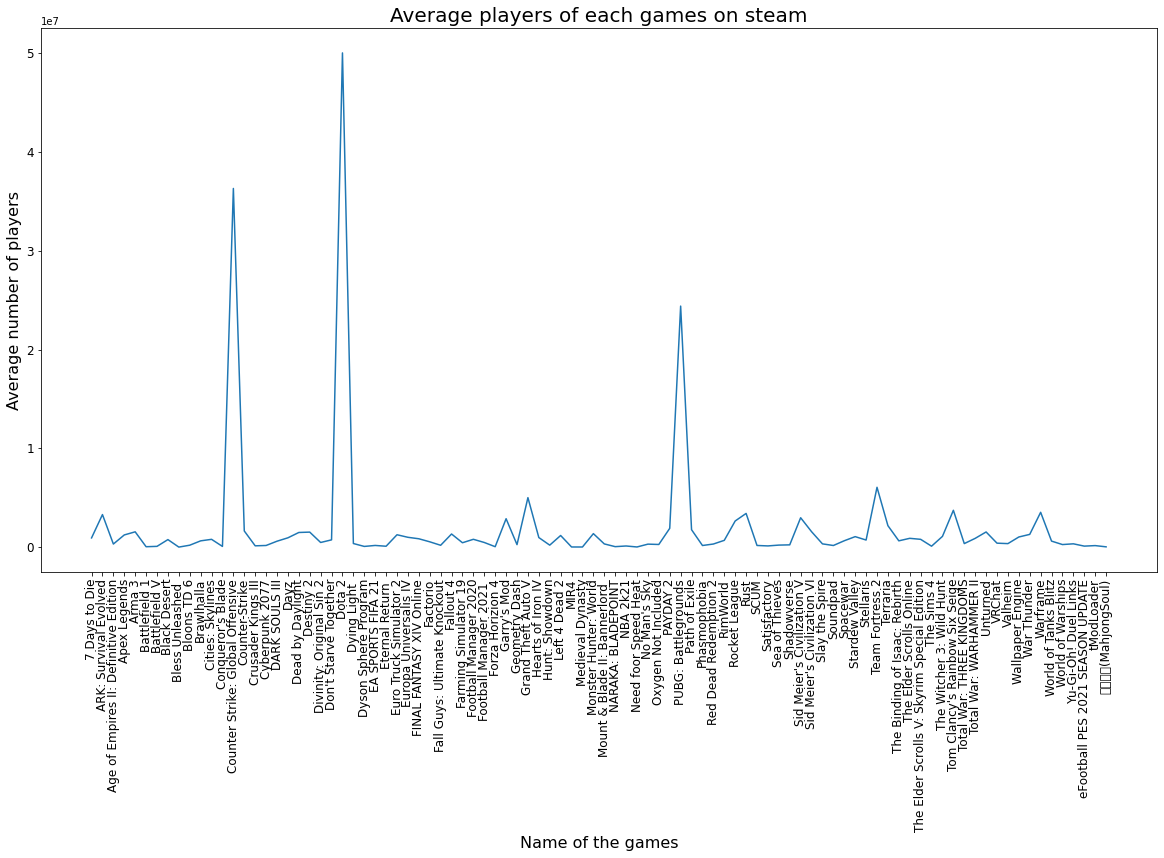

In [24]:
x = new_games['Game_Name']
y = new_games['Avg_players']
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,y)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.xlabel('Name of the games', size=16)
plt.ylabel('Average number of players', size=16)
plt.title('Average players of each games on steam', size=20)
plt.show()

### So what can we see here is that maximum number of players for the corresponding game belongs the game of 
### 1. 'Dota 2',  'Dont starve together' and 'Dying light' (Yup i can confirm cause i played all those), followed by 
### 2. 'Conquerers blade' , 'CS GO' and 'CS' and at last 
### 3. 'Payday 2, 'PUBG', and 'Path exile'

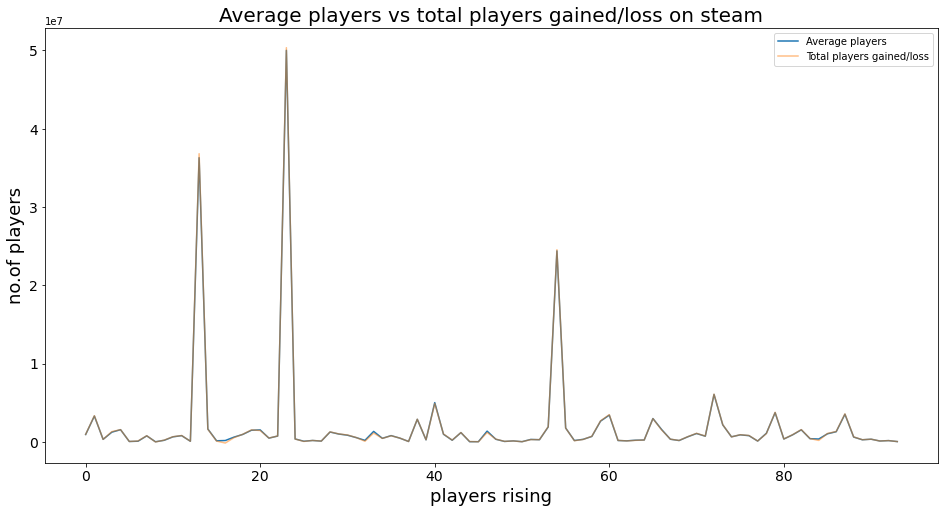

In [25]:
new_games['Avg_players'].plot(label='Average players', figsize=(16,8))
new_games['Total_gain_loss'].plot(label='Total players gained/loss', alpha=0.5)
plt.legend()
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('players rising', size=18)
plt.ylabel('no.of players', size=18)
plt.title('Average players vs total players gained/loss on steam', size=20)
plt.show()

### So you may not see the graph properly because of the color contrast but we can see a similar pattern between the average number of players and total players gained or loss however,
### there is some or perhaps less than 1% of changes thats happening in this graph that is not easy to see

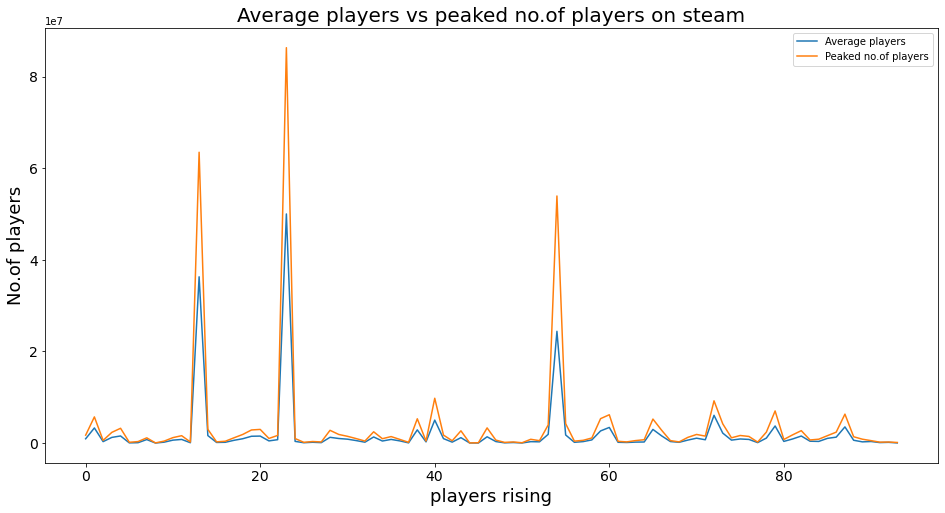

In [26]:
new_games['Avg_players'].plot(label='Average players', figsize=(16,8))
new_games['Peak_Players'].plot(label='Peaked no.of players')
plt.legend()
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('players rising', size=18)
plt.ylabel('No.of players', size=18)
plt.title('Average players vs peaked no.of players on steam', size=20)
plt.show()

### Now what we can observe from this is that players were peaked for certain games and is much higher than the average number of players playing on steam so what does that mean,
### it means that players increased but soon after they stopped increasing perhaps the games became overrated or boring to play bringing the average number of players down 
### (Its obvious after sometime the same hyped up game starts dying).

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23558 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 39746 missing from cur

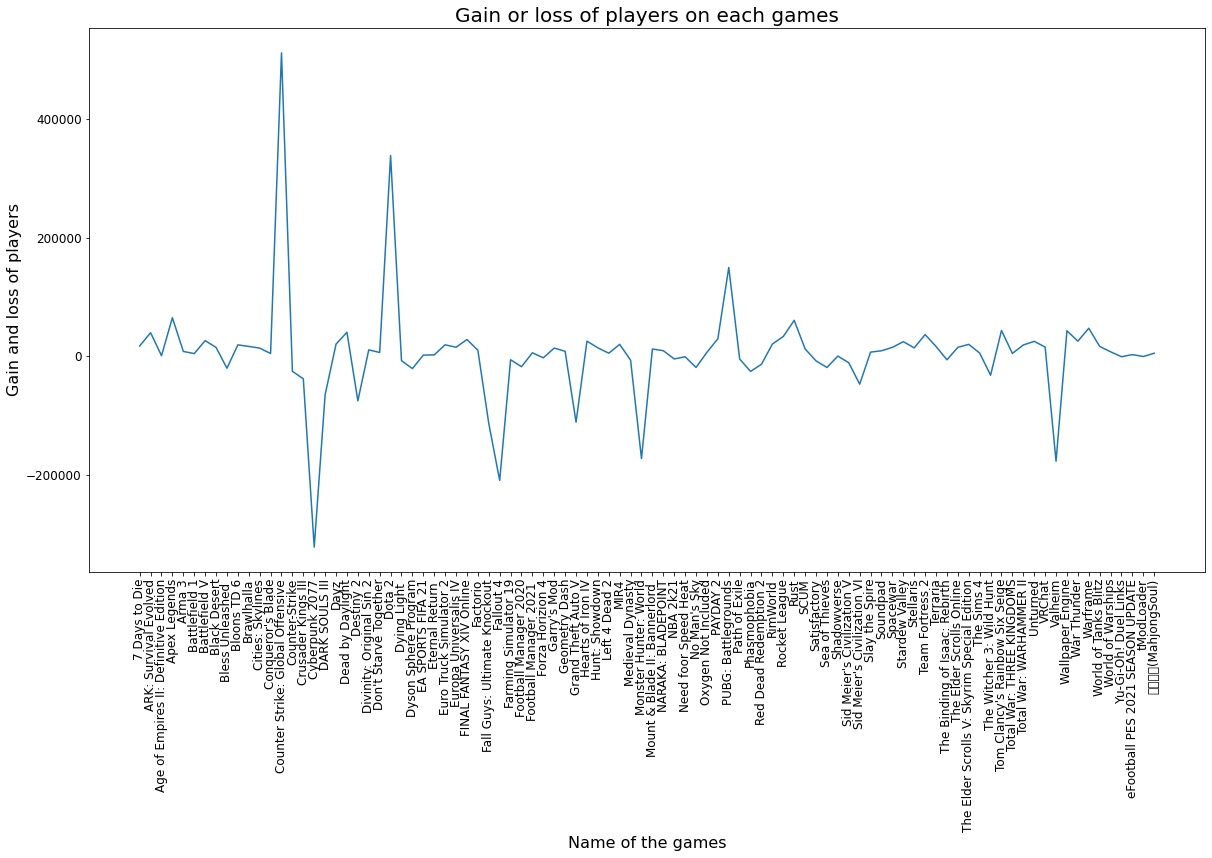

In [27]:
x = new_games['Game_Name']
y = new_games['Gain']
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,y)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.xlabel('Name of the games', size=16)
plt.ylabel('Gain and loss of players', size=16)
plt.title('Gain or loss of players on each games', size=20)
plt.show()

### Okay this is pretty interesting as we can observe n number of things here in this graph and whats that

### 1. Conquerer's blade, CS and CSGO gained a good amount of players because back at that time the games                  started streamed by the streamers and pro league tournaments were held back at that time based on those              games.

### 2. Don't starve together, Dying light and dota 2 also gained a good number of players because the following                  reasons:
###     a) Dying light 2 was announced and hence dying light 1 got attraction again.
###     b) Don't starve together was new and had good story and hence gained players.
###     c) Don't know about dota 2 never liked it.

### 3. Cyberpunk 2077 lost a lot of players because of the game's broken mechanics and glitches despite its hype.

### 4. Fallout 4 and monster hunter lost a lot of players as well cause their hype started dying and the story was                pretty floppy despite the game's mechanics was excellent.

<AxesSubplot:>

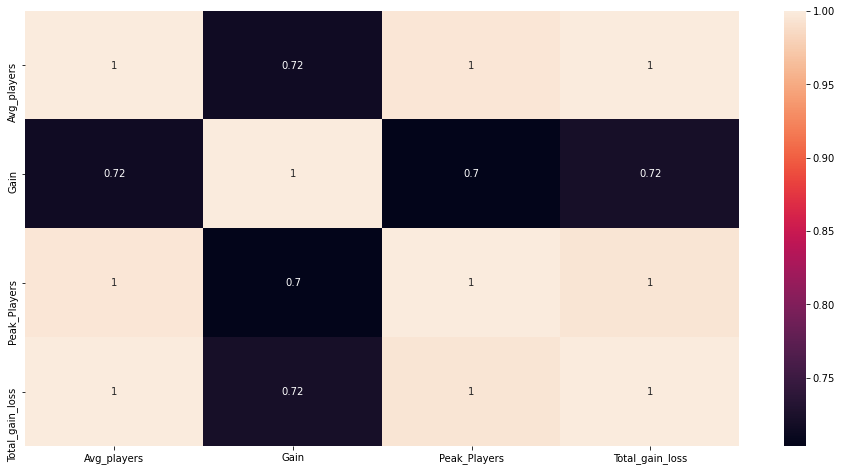

In [28]:
plt.figure(figsize=(16,8))
corr1 = new_games.corr()
sns.heatmap(corr1, annot=True)

## We can see a lot of correlation here between a few things when it comes to games

### 1. Average no.of players and total gain loss because if one increases the other also increases and vice versa

### 2. Total gain and loss and peak because the more the players the more the gain.

### 3. Average players and peak players because the more the players increases there will be a max number of players at that moment of time at the end of the day or month even year

<AxesSubplot:>

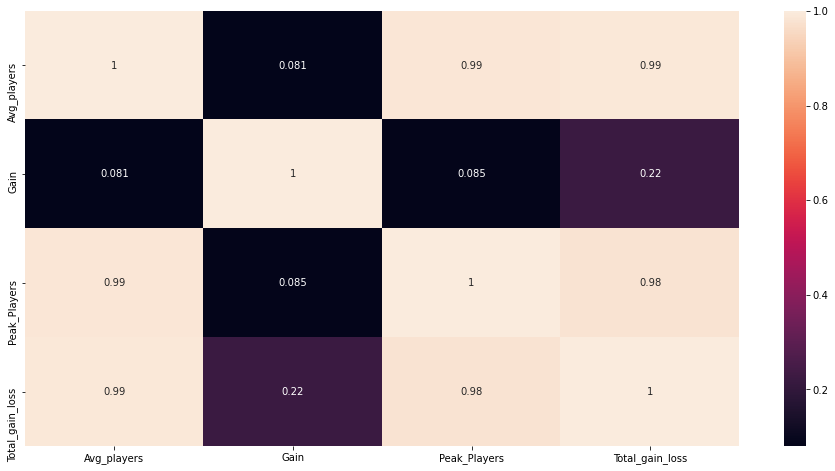

In [29]:
plt.figure(figsize=(16,8))
corr2 = new_dates.corr()
sns.heatmap(corr2, annot=True)

### We can see a few correlations here between the players for certain dates all of which are closely related (0.99 or 0.98 so that's fair) because with time, the game improves with each updates and hence the players also  increases with that event. However, in some event with the time increases, the game soon dies because of bad mechanics, glitches, hackers or cheaters etc and so we can close to no correlation between them.

## ...................................................................................................................................................

## Now we will see the top games played on each games and on each dates as well

In [30]:
new_games_sorted_1 = new_games.sort_values(by = 'Avg_players', ascending=False)
new_games_sorted_1

,Game_Name,Avg_players,Gain,Peak_Players,Total_gain_loss
23,Dota 2,50015471.41,338361.00,86304680,50353832.41
13,Counter Strike: Global Offensive,36302141.22,511418.34,63483737,36813559.56
54,PUBG: Battlegrounds,24401087.97,149550.99,53938976,24550638.96
72,Team Fortress 2,6069172.60,36287.09,9234448,6105459.69
40,Grand Theft Auto V,5021877.15,-111481.83,9793756,4910395.32
...,...,...,...,...,...
93,雀魂麻将(MahjongSoul),45234.45,4850.49,139087,50084.94
50,Need foor Speed Heat,31904.99,-1109.21,81565,30795.78
44,MIR4,30876.43,19801.91,41962,50678.34
45,Medieval Dynasty,29049.62,-6879.98,81335,22169.64


In [31]:
values1 = new_games_sorted_1['Avg_players'].head(10)
names = new_games_sorted_1['Game_Name'].head(10)

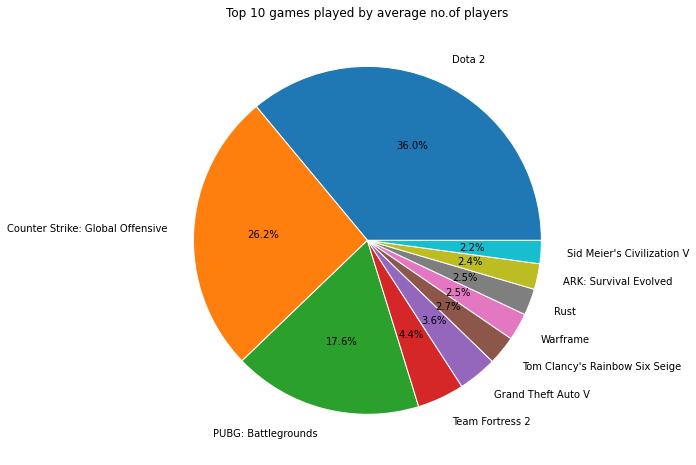

In [32]:
plt.figure(figsize=(16,8))
plt.pie(values1, labels=names, labeldistance=1.15, autopct='%.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Top 10 games played by average no.of players')
plt.show()

### As we can see based on the average number of players, dota 2 is conquering, followed by CSGO and then PUBG

In [33]:
new_games_sorted_2 = new_games.sort_values(by = 'Peak_Players', ascending=False)
new_games_sorted_2

,Game_Name,Avg_players,Gain,Peak_Players,Total_gain_loss
23,Dota 2,50015471.41,338361.00,86304680,50353832.41
13,Counter Strike: Global Offensive,36302141.22,511418.34,63483737,36813559.56
54,PUBG: Battlegrounds,24401087.97,149550.99,53938976,24550638.96
40,Grand Theft Auto V,5021877.15,-111481.83,9793756,4910395.32
72,Team Fortress 2,6069172.60,36287.09,9234448,6105459.69
...,...,...,...,...,...
93,雀魂麻将(MahjongSoul),45234.45,4850.49,139087,50084.94
50,Need foor Speed Heat,31904.99,-1109.21,81565,30795.78
45,Medieval Dynasty,29049.62,-6879.98,81335,22169.64
8,Bless Unleashed,19808.97,-20457.22,47966,-648.25


In [34]:
values2 = new_games_sorted_2['Peak_Players'].head(10)
names2 = new_games_sorted_2['Game_Name'].head(10)

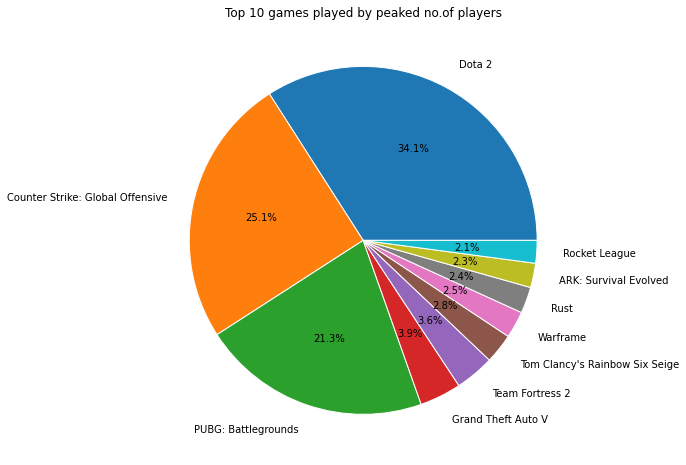

In [35]:
plt.figure(figsize=(16,8))
plt.pie(values2, labels=names2, labeldistance=1.15, autopct='%.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Top 10 games played by peaked no.of players')
plt.show()

### And here is the same, maximum players reached is max for dota 2 followed by CS GO and then PUBG based on peaked players

In [36]:
new_games_sorted_3 = new_games.sort_values(by = 'Total_gain_loss', ascending=False)
new_games_sorted_3

,Game_Name,Avg_players,Gain,Peak_Players,Total_gain_loss
23,Dota 2,50015471.41,338361.00,86304680,50353832.41
13,Counter Strike: Global Offensive,36302141.22,511418.34,63483737,36813559.56
54,PUBG: Battlegrounds,24401087.97,149550.99,53938976,24550638.96
72,Team Fortress 2,6069172.60,36287.09,9234448,6105459.69
40,Grand Theft Auto V,5021877.15,-111481.83,9793756,4910395.32
...,...,...,...,...,...
93,雀魂麻将(MahjongSoul),45234.45,4850.49,139087,50084.94
50,Need foor Speed Heat,31904.99,-1109.21,81565,30795.78
45,Medieval Dynasty,29049.62,-6879.98,81335,22169.64
8,Bless Unleashed,19808.97,-20457.22,47966,-648.25


In [37]:
values3 = new_games_sorted_3['Total_gain_loss'].head(10)
names3 = new_games_sorted_3['Game_Name'].head(10)

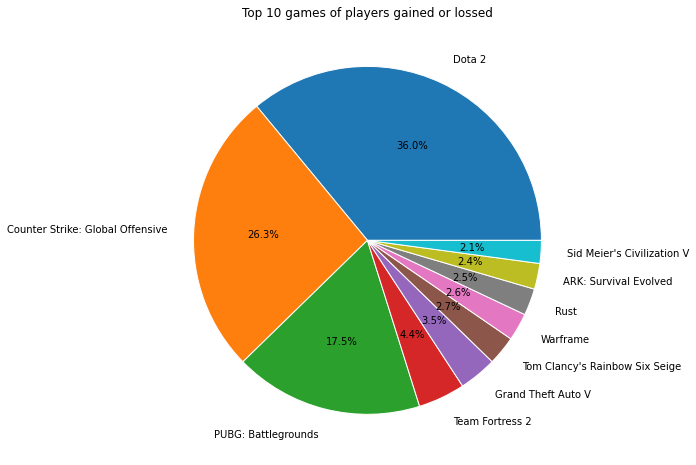

In [38]:
plt.figure(figsize=(16,8))
plt.pie(values3, labels=names3, labeldistance=1.15, autopct='%.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Top 10 games of players gained or lossed')
plt.show()

### and also the same here so no need of further explanation

## ...................................................................................................................................................

### Now, we will work on the dates though the dates might not interpret much but we will still see whats happening.


### and also check the top players for each date

In [39]:
new_dates

,Month_Year,Avg_players,Gain,Peak_Players,Total_gain_loss
0,April 2013,0.35,-0.49,6,-0.14
1,April 2013,4.00,-0.06,22,3.94
2,April 2013,32.48,-12.61,79,19.87
3,April 2013,783.62,-165.25,1944,618.37
4,April 2013,2035.86,-2710.11,4536,-674.25
...,...,...,...,...,...
5168,September 2021,89845.19,32606.68,147513,122451.87
5169,September 2021,139647.96,-29880.22,273617,109767.74
5170,September 2021,167102.12,-17726.28,400709,149375.84
5171,September 2021,391082.08,-33898.09,666838,357183.99


In [40]:
print(new_dates.iloc[[new_dates['Avg_players'].argmax()]])
print('-' *75)
print(new_dates.iloc[[new_dates['Gain'].argmax()]])
print('-' *75)
print(new_dates.iloc[[new_dates['Peak_Players'].argmax()]])
print('-' *75)
print(new_dates.iloc[[new_dates['Total_gain_loss'].argmax()]])

        Month_Year  Avg_players       Gain  Peak_Players  Total_gain_loss
1924  January 2018   1584886.77  148728.26       3236027       1733615.03
---------------------------------------------------------------------------
        Month_Year  Avg_players       Gain  Peak_Players  Total_gain_loss
4490  October 2017   1086638.87  426446.12       2390946       1513084.99
---------------------------------------------------------------------------
        Month_Year  Avg_players       Gain  Peak_Players  Total_gain_loss
1924  January 2018   1584886.77  148728.26       3236027       1733615.03
---------------------------------------------------------------------------
        Month_Year  Avg_players       Gain  Peak_Players  Total_gain_loss
1924  January 2018   1584886.77  148728.26       3236027       1733615.03


In [41]:
new_dates_sorted_1 = new_dates.sort_values(by = 'Avg_players', ascending=False)
new_dates_sorted_1

,Month_Year,Avg_players,Gain,Peak_Players,Total_gain_loss
1924,January 2018,1584886.77,148728.26,3236027,1733615.03
1088,December 2017,1436158.51,101988.42,3080769,1538146.93
1505,February 2018,1391015.30,-193871.48,2934761,1197143.82
4097,November 2017,1334170.09,247531.23,2915723,1581701.32
3248,March 2018,1295408.59,-95606.71,2799269,1199801.88
...,...,...,...,...,...
4308,October 2012,0.00,0.00,0,0.00
4697,September 2012,0.00,0.00,0,0.00
3470,May 2013,0.00,0.00,0,0.00
896,December 2012,0.00,0.00,0,0.00


In [42]:
new_dates_sorted_2 = new_dates.sort_values(by = 'Peak_Players', ascending=False)
new_dates_sorted_2

,Month_Year,Avg_players,Gain,Peak_Players,Total_gain_loss
1924,January 2018,1584886.77,148728.26,3236027,1733615.03
1088,December 2017,1436158.51,101988.42,3080769,1538146.93
1505,February 2018,1391015.30,-193871.48,2934761,1197143.82
4097,November 2017,1334170.09,247531.23,2915723,1581701.32
3248,March 2018,1295408.59,-95606.71,2799269,1199801.88
...,...,...,...,...,...
3908,November 2012,0.00,0.00,0,0.00
4697,September 2012,0.00,0.00,0,0.00
896,December 2012,0.00,0.00,0,0.00
2598,June 2013,0.00,0.00,0,0.00


In [43]:
new_dates_sorted_3 = new_dates.sort_values(by = 'Total_gain_loss', ascending=False)
new_dates_sorted_3

,Month_Year,Avg_players,Gain,Peak_Players,Total_gain_loss
1924,January 2018,1584886.77,148728.26,3236027,1733615.03
4097,November 2017,1334170.09,247531.23,2915723,1581701.32
1088,December 2017,1436158.51,101988.42,3080769,1538146.93
4490,October 2017,1086638.87,426446.12,2390946,1513084.99
3248,March 2018,1295408.59,-95606.71,2799269,1199801.88
...,...,...,...,...,...
1700,February 2021,24704.84,-57441.83,47115,-32736.99
978,December 2015,94136.37,-132161.46,201635,-38025.09
421,April 2021,69367.02,-109068.42,159037,-39701.40
3797,May 2020,31529.86,-81963.14,77878,-50433.28


In [48]:
values11 = new_dates_sorted_1['Avg_players'].head(10)
names11 = new_dates_sorted_1['Month_Year'].head(10)

In [49]:
values21 = new_dates_sorted_2['Peak_Players'].head(10)
names21 = new_dates_sorted_2['Month_Year'].head(10)

In [50]:
values31 = new_dates_sorted_3['Total_gain_loss'].head(10)
names31 = new_dates_sorted_3['Month_Year'].head(10)

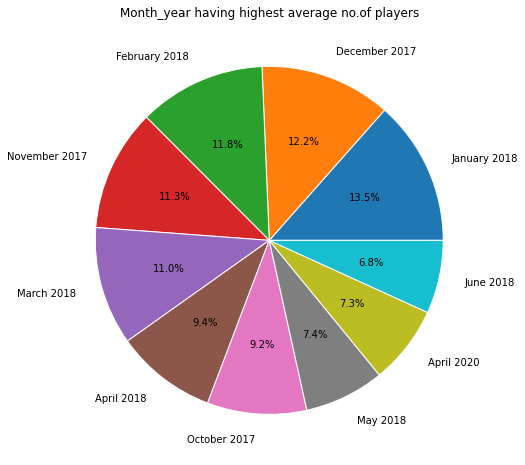

In [57]:
plt.figure(figsize=(16,8))
plt.pie(values11, labels=names11, labeldistance=1.15, autopct='%.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Month_year having highest average no.of players')
plt.show()

### So as we can see that, most players on the count of average is on January 2018 followed by december 2017 and then on february 2018.

### Probably because some updates or new games released or some old games being hyped up suddenly.

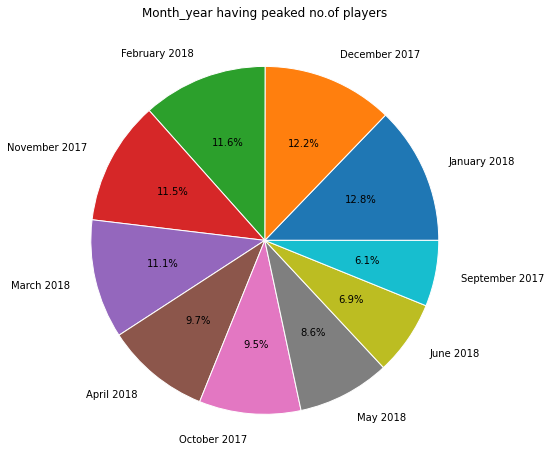

In [56]:
plt.figure(figsize=(16,8))
plt.pie(values21, labels=names21, labeldistance=1.15, autopct='%.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Month_year having peaked no.of players')
plt.show()

### By peaked number of players, we can see the maximum players reached was same on january 2018 followed by december 2017 and then february 2018

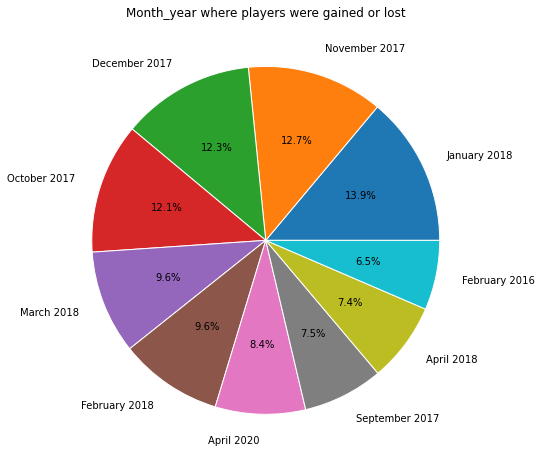

In [58]:
plt.figure(figsize=(16,8))
plt.pie(values31, labels=names31, labeldistance=1.15, autopct='%.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Month_year where players were gained or lost')
plt.show()

### From total players gained or loss we can observe that players gained from the last time remained top at january 2018 followed by november 2017 now instead of december which lies next at december 2017 and february 2018 got 9.6% hence they lost adequate number of players there.

## ..........................................................................................................

## .........................................................................................................................................

# Conclusion

### So what we can observe here, max number of players are rising during some festive years like christmas or new year so that is where the gaming companies should try giving more discounts to attract more players 

### Also, the game they love playing should be lying between RPG and FPS 

# .............................................................................................................................

## If you all believe there are some changes that i can make